## Dataframe import

In [1]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
pyFBS.download_rubber_mount()

In [3]:
stl = r"rubber_mount/STL/model.stl"
pos_xlsx = r"rubber_mount/Measurements/data.xlsx"

df_chn = pd.read_excel(pos_xlsx, sheet_name='Channels')
df_imp = pd.read_excel(pos_xlsx, sheet_name='Impacts')
df_acc = pd.read_excel(pos_xlsx, sheet_name='Sensors')
df_vp = pd.read_excel(pos_xlsx, sheet_name='VP') 
df_vpref = pd.read_excel(pos_xlsx, sheet_name='VP_ref') 

## 3D Viewer

In [4]:
view3D = pyFBS.view3D(show_origin= True)

view3D.add_stl(stl)

PolyData,Information
N Cells,18292
N Points,9144
X Bounds,"5.724e-01, 1.111e+02"
Y Bounds,"2.374e+00, 1.561e+02"
Z Bounds,"5.500e-01, 1.105e+02"
N Arrays,0


In [5]:
view3D.show_imp(df_imp)
view3D.label_imp(df_imp)

view3D.show_chn(df_chn)
view3D.label_chn(df_chn)

view3D.show_acc(df_acc)

## Path to FRF and Frequencies

In [6]:
Y_AJB = np.load('./rubber_mount/Measurements/Y_AJB.npy')
freq = np.load('./rubber_mount/Measurements/freq.npy')

## Virtual point transformation 
For the VPT the information on the position/orientation of the virtual point is required (``df_vp`` and ``df_vpref`` for output and input respectively), together with the corresponding channel/impact information (``df_channels`` and ``df_impacts`` for output and input respectively). Care should be taken that the correct ``Grouping`` number is assigned to obtain the correct transformation. Currently only rigid body IDMs can be used in the transformation. 

In [7]:
# unit consistency (all distances in m)
df_imp[['Position_1', 'Position_2', 'Position_3']] /= 1000
df_chn[['Position_1', 'Position_2', 'Position_3']] /= 1000
df_vp[['Position_1', 'Position_2', 'Position_3']] /= 1000
df_vpref[['Position_1', 'Position_2', 'Position_3']] /= 1000

In [8]:
vpt = pyFBS.VPT(df_chn,df_imp,df_vp,df_vpref,sort_matrix=True)

In [9]:
vpt.apply_VPT(freq, Y_AJB)

Display the FRFs of the new virtual DoFs:

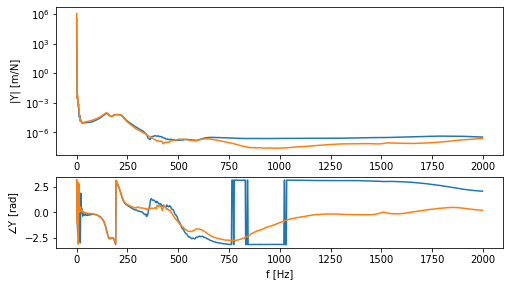

In [10]:
o = 1
i = 3

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.semilogy(vpt.freq,np.abs(vpt.vptData[:,o,i]))
plt.semilogy(vpt.freq,np.abs(vpt.vptData[:,i,o]))
plt.ylabel('|Y| [m/N]')

plt.subplot(413)
plt.plot(vpt.freq,np.angle(vpt.vptData[:,o,i]))
plt.plot(vpt.freq,np.angle(vpt.vptData[:,i,o]))
plt.xlabel('f [Hz]')
plt.ylabel(r'$\angle$Y [rad]');

#### Consistency of the VPT
The evaluation of consistency of the VPT is based on the grouping number:

In [11]:
vpt.consistency([1],[1])

Specific channel/sensor and impact consistency

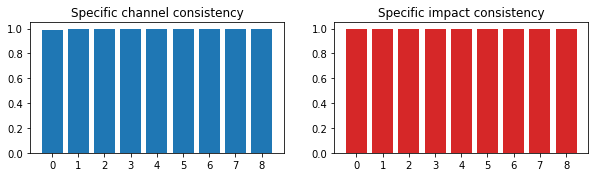

In [12]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.bar(range(9),vpt.specific_sensor,color = "tab:blue")
plt.xticks(range(9))
plt.title("Specific channel consistency")

plt.subplot(122)
plt.bar(range(9),vpt.specific_impact,color = "tab:red")
plt.xticks(range(9));
plt.title("Specific impact consistency");

Overall channel/sensor and impact consistency

Text(0.5, 0, 'Frequency [Hz]')

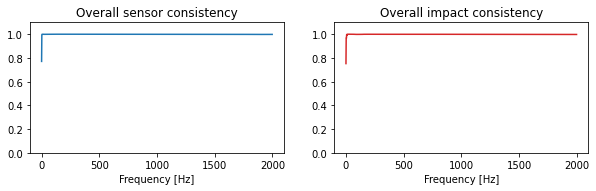

In [13]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.plot(vpt.freq,vpt.overall_sensor,color = "tab:blue")
plt.ylim(0,1.1)
plt.title("Overall sensor consistency")
plt.xlabel("Frequency [Hz]")

plt.subplot(122)
plt.plot(vpt.freq,vpt.overall_impact,color = "tab:red")
plt.ylim(0,1.1)
plt.title("Overall impact consistency")
plt.xlabel("Frequency [Hz]")

In [14]:
vpt.consistency([2],[2])

Specific channel/sensor and impact consistency

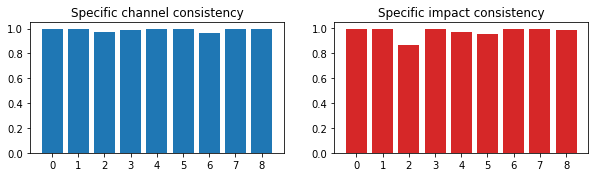

In [15]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.bar(range(9),vpt.specific_sensor,color = "tab:blue")
plt.xticks(range(9))
plt.title("Specific channel consistency")

plt.subplot(122)
plt.bar(range(9),vpt.specific_impact,color = "tab:red")
plt.xticks(range(9));
plt.title("Specific impact consistency");

Overall channel/sensor and impact consistency

Text(0.5, 0, 'Frequency [Hz]')

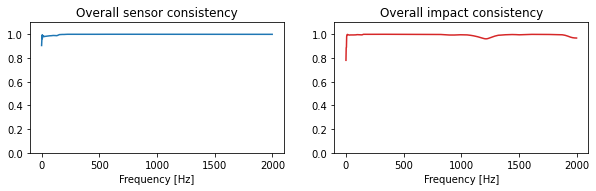

In [16]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.plot(vpt.freq,vpt.overall_sensor,color = "tab:blue")
plt.ylim(0,1.1)
plt.title("Overall sensor consistency")
plt.xlabel("Frequency [Hz]")

plt.subplot(122)
plt.plot(vpt.freq,vpt.overall_impact,color = "tab:red")
plt.ylim(0,1.1)
plt.title("Overall impact consistency")
plt.xlabel("Frequency [Hz]")

Reciprocity check on the FRF matrix

In [17]:
coh_crit = pyFBS.utility.coh_on_FRF(vpt.vptData[:,6:,6:])

pyFBS.imshow(coh_crit)

alt.Chart(...)

In [18]:
Z_AJB = np.linalg.pinv(vpt.vptData)
Z_AJB.shape

(1000, 12, 12)

### Crosses

In [19]:
Y_A_B = np.load('./rubber_mount/Measurements/Y_A_B.npy')
Y_A_B.shape

(1000, 18, 18)

In [20]:
vpt.apply_VPT(freq, Y_A_B)

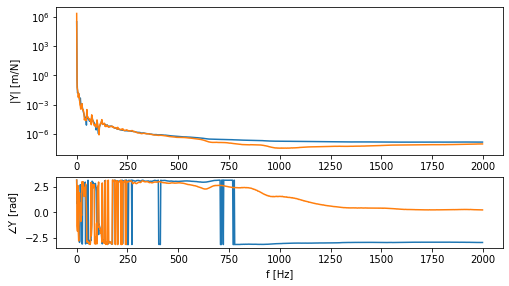

In [21]:
o = 1
i = 3

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.semilogy(vpt.freq,np.abs(vpt.vptData[:,o,i]))
plt.semilogy(vpt.freq,np.abs(vpt.vptData[:,i,o]))
plt.ylabel('|Y| [m/N]')

plt.subplot(413)
plt.plot(vpt.freq,np.angle(vpt.vptData[:,o,i]))
plt.plot(vpt.freq,np.angle(vpt.vptData[:,i,o]))
plt.xlabel('f [Hz]')
plt.ylabel(r'$\angle$Y [rad]');

In [22]:
vpt.consistency([1],[1])

Specific channel/sensor and impact consistency

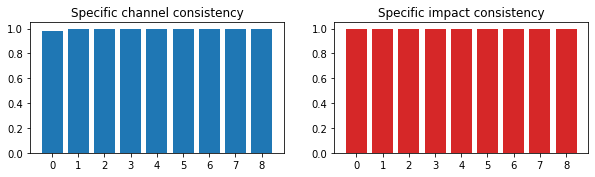

In [23]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.bar(range(9),vpt.specific_sensor,color = "tab:blue")
plt.xticks(range(9))
plt.title("Specific channel consistency")

plt.subplot(122)
plt.bar(range(9),vpt.specific_impact,color = "tab:red")
plt.xticks(range(9));
plt.title("Specific impact consistency");

Overall channel/sensor and impact consistency

Text(0.5, 0, 'Frequency [Hz]')

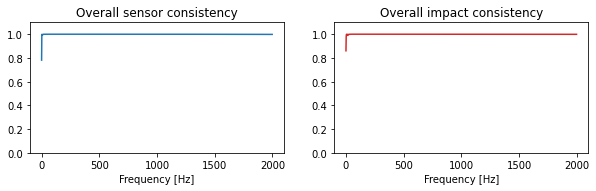

In [24]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.plot(vpt.freq,vpt.overall_sensor,color = "tab:blue")
plt.ylim(0,1.1)
plt.title("Overall sensor consistency")
plt.xlabel("Frequency [Hz]")

plt.subplot(122)
plt.plot(vpt.freq,vpt.overall_impact,color = "tab:red")
plt.ylim(0,1.1)
plt.title("Overall impact consistency")
plt.xlabel("Frequency [Hz]")

In [25]:
vpt.consistency([2],[2])

Specific channel/sensor and impact consistency

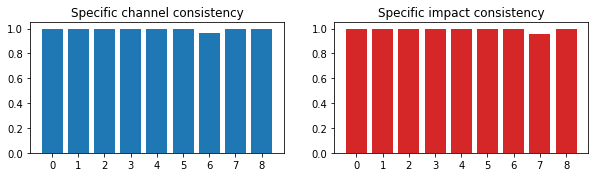

In [26]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.bar(range(9),vpt.specific_sensor,color = "tab:blue")
plt.xticks(range(9))
plt.title("Specific channel consistency")

plt.subplot(122)
plt.bar(range(9),vpt.specific_impact,color = "tab:red")
plt.xticks(range(9));
plt.title("Specific impact consistency");

Overall channel/sensor and impact consistency

Text(0.5, 0, 'Frequency [Hz]')

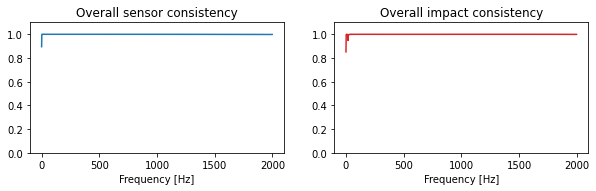

In [27]:
plt.figure(figsize = (10,2.4))
plt.subplot(121)
plt.plot(vpt.freq,vpt.overall_sensor,color = "tab:blue")
plt.ylim(0,1.1)
plt.title("Overall sensor consistency")
plt.xlabel("Frequency [Hz]")

plt.subplot(122)
plt.plot(vpt.freq,vpt.overall_impact,color = "tab:red")
plt.ylim(0,1.1)
plt.title("Overall impact consistency")
plt.xlabel("Frequency [Hz]")

In [28]:
Y_A = vpt.vptData[:,:6,:6]
Y_A.shape

(1000, 6, 6)

In [29]:
Y_B = vpt.vptData[:,6:,6:]
Y_B.shape

(1000, 6, 6)

In [30]:
Z_A = np.linalg.pinv(Y_A)
Z_B = np.linalg.pinv(Y_B)

Z_A.shape, Z_B.shape

((1000, 6, 6), (1000, 6, 6))

In [31]:
Z_A_B = np.zeros_like(Z_AJB)
Z_A_B[:,:6,:6] = Z_A
Z_A_B[:,6:,6:] = Z_B

In [32]:
Z_J = Z_AJB - Z_A_B

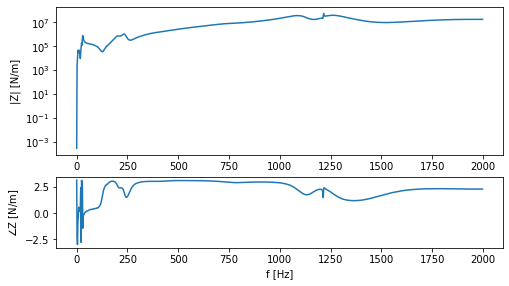

In [33]:
plt.figure(figsize = (8,6))

o = 0
i = 0

plt.subplot(211)
plt.semilogy(vpt.freq,np.abs(Z_J[:,o,i]))
plt.ylabel(r'|Z| [N/m]');

plt.subplot(413)
plt.plot(vpt.freq,np.angle(Z_J[:,o,i]));
plt.xlabel('f [Hz]')
plt.ylabel(r'$\angle$Z [N/m]');